In [91]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures, DropCorrelatedFeatures, SmartCorrelatedSelection
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold

In [2]:
df = pd.read_csv("../data/dataset_1.csv")

In [3]:
df.head()

,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,...,var_292,var_293,var_294,var_295,var_296,var_297,var_298,var_299,var_300,target
0,0,0,0.0,0.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
1,0,0,0.0,3.00,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
2,0,0,0.0,5.88,0.0,0,0,0,0,0,...,0.0,0,0,3,0,0,0,0.0,67772.7216,0
3,0,0,0.0,14.10,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0
4,0,0,0.0,5.76,0.0,0,0,0,0,0,...,0.0,0,0,0,0,0,0,0.0,0.0000,0


In [4]:
df.shape

(50000, 301)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=["target"], axis=1),
    df["target"],
    test_size=0.3,
    random_state=0,
)

In [6]:
sel = VarianceThreshold(threshold=0)
sel.fit(X_train)

VarianceThreshold(threshold=0)

In [7]:
# features that are not retained, false for features with variance less than threshold
sum(sel.get_support())

266

In [8]:
df.nunique()

var_1         4
var_2         2
var_3        26
var_4        75
var_5       222
           ... 
var_297       1
var_298       4
var_299      36
var_300    1878
target        2
Length: 301, dtype: int64

In [9]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
        True,  True,  True,  True,  True, False,  True, False,  True,
        True, False,  True,  True,  True,  True, False,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
       False,  True,

In [10]:
constant = X_train.columns[~sel.get_support()]

In [11]:
constant

Index(['var_23', 'var_33', 'var_44', 'var_61', 'var_80', 'var_81', 'var_87',
       'var_89', 'var_92', 'var_97', 'var_99', 'var_112', 'var_113', 'var_120',
       'var_122', 'var_127', 'var_135', 'var_158', 'var_167', 'var_170',
       'var_171', 'var_178', 'var_180', 'var_182', 'var_195', 'var_196',
       'var_201', 'var_212', 'var_215', 'var_225', 'var_227', 'var_248',
       'var_294', 'var_297'],
      dtype='object')

In [12]:
feat_names = X_train.columns[sel.get_support()]

In [13]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [14]:
X_train = pd.DataFrame(X_train, columns=feat_names)
X_test = pd.DataFrame(X_test, columns=feat_names)

now using pandas only

In [15]:
df = pd.read_csv("../data/dataset_1.csv")

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=["target"], axis=1),
    df["target"],
    test_size=0.3,
    random_state=0,
)

In [17]:
constant = [col for col in X_train.columns if X_train[col].std() == 0]

In [18]:
len(constant)

34

In [19]:
X_train.drop(labels=constant, axis=1, inplace=True)

code above only find the numerical variables, how do we find the categorical variables?

In [20]:
df = pd.read_csv("../data/dataset_1.csv")
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=["target"], axis=1),
    df["target"],
    test_size=0.3,
    random_state=0,
)

In [21]:
X_train = X_train.astype("O")

constant = [col for col in X_train.columns if X_train[col].nunique() == 1]

In [22]:
len(constant)

34

quasi constant features

In [23]:
X_train.drop(labels=constant, axis=1, inplace=True)

In [24]:
X_test.drop(labels=constant, axis=1, inplace=True)

In [25]:
X_train.shape, X_test.shape

((35000, 266), (15000, 266))

In [26]:
sel = VarianceThreshold(threshold=.01)

In [27]:
sel.fit(X_train)

VarianceThreshold(threshold=0.01)

In [28]:
sum(sel.get_support())

215

In [29]:
quasi_constant = X_train.columns[~sel.get_support()]

In [30]:
quasi_constant

Index(['var_1', 'var_2', 'var_7', 'var_9', 'var_10', 'var_19', 'var_28',
       'var_36', 'var_43', 'var_45', 'var_53', 'var_56', 'var_59', 'var_66',
       'var_67', 'var_69', 'var_71', 'var_104', 'var_106', 'var_116',
       'var_133', 'var_137', 'var_141', 'var_146', 'var_177', 'var_187',
       'var_189', 'var_194', 'var_197', 'var_198', 'var_202', 'var_218',
       'var_219', 'var_223', 'var_233', 'var_234', 'var_235', 'var_245',
       'var_247', 'var_249', 'var_250', 'var_251', 'var_256', 'var_260',
       'var_267', 'var_274', 'var_282', 'var_285', 'var_287', 'var_289',
       'var_298'],
      dtype='object')

In [31]:
X_train = sel.transform(X_train)

In [32]:
X_test = sel.transform(X_test)

In [33]:
df = pd.read_csv("../data/dataset_1.csv")
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=["target"], axis=1),
    df["target"],
    test_size=0.3,
    random_state=0,
)

In [34]:
constant = [col for col in X_train.columns if X_train[col].std() == 0]
X_train = X_train.drop(labels=constant, axis=1)

In [35]:
X_test.drop(labels=constant, axis=1, inplace=True)

In [36]:
quasi_constant_feat = []

for feat in X_train.columns:
    predominant = (
        (X_train[feat].value_counts() / float(len(X_train)))
        .sort_values(ascending=False)
        .values[0]
    )
    if predominant > 0.999:
        quasi_constant_feat.append(feat)

In [37]:
len(quasi_constant_feat)

85

duplicated features

In [38]:
duplicated_feat_pairs = {}
_duplicated_feat = []

for i in range(len(X_train.columns)):
    feat_1 = X_train.columns[i]
    if feat_1 not in _duplicated_feat:
        duplicated_feat_pairs[feat_1] = []
        for feat_2 in X_train.columns[i + 1:]:
            if X_train[feat_1].equals(X_train[feat_2]):
                duplicated_feat_pairs[feat_1].append(feat_2)
                _duplicated_feat.append(feat_2)
        

In [39]:
X_train = X_train[duplicated_feat_pairs.keys()]
X_test = X_test[duplicated_feat_pairs.keys()]

using feature-engine

In [40]:
df = pd.read_csv("../data/dataset_1.csv")
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=["target"], axis=1),
    df["target"],
    test_size=0.3,
    random_state=0,
)

In [41]:
sel = DropConstantFeatures(tol=.998, variables=None, missing_values="raise")

In [42]:
sel.fit(X_train)

DropConstantFeatures(tol=0.998)

In [43]:
sel.features_to_drop_

['var_1',
 'var_2',
 'var_3',
 'var_6',
 'var_7',
 'var_9',
 'var_10',
 'var_11',
 'var_12',
 'var_14',
 'var_16',
 'var_20',
 'var_23',
 'var_24',
 'var_28',
 'var_32',
 'var_33',
 'var_34',
 'var_36',
 'var_39',
 'var_40',
 'var_42',
 'var_43',
 'var_44',
 'var_45',
 'var_48',
 'var_53',
 'var_56',
 'var_59',
 'var_60',
 'var_61',
 'var_65',
 'var_66',
 'var_67',
 'var_69',
 'var_71',
 'var_72',
 'var_73',
 'var_77',
 'var_78',
 'var_80',
 'var_81',
 'var_87',
 'var_89',
 'var_90',
 'var_92',
 'var_95',
 'var_97',
 'var_98',
 'var_99',
 'var_102',
 'var_104',
 'var_106',
 'var_111',
 'var_112',
 'var_113',
 'var_115',
 'var_116',
 'var_120',
 'var_122',
 'var_124',
 'var_125',
 'var_126',
 'var_127',
 'var_129',
 'var_130',
 'var_133',
 'var_135',
 'var_136',
 'var_138',
 'var_141',
 'var_142',
 'var_146',
 'var_149',
 'var_150',
 'var_151',
 'var_153',
 'var_158',
 'var_159',
 'var_167',
 'var_170',
 'var_171',
 'var_178',
 'var_180',
 'var_182',
 'var_183',
 'var_184',
 'var_187',


In [44]:
len(sel.features_to_drop_)

142

In [45]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [46]:
X_train.shape, X_test.shape

((35000, 158), (15000, 158))

drop duplicated features with featureengine

In [47]:
df = pd.read_csv("../data/dataset_1.csv")
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=["target"], axis=1),
    df["target"],
    test_size=0.3,
    random_state=0,
)

In [48]:
sel = DropConstantFeatures(tol=.998, variables=None, missing_values="raise")
sel.fit(X_train)
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

In [49]:
sel = DropDuplicateFeatures(variables=None, missing_values="raise")
sel.fit(X_train)
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

correlation

In [50]:
df = pd.read_csv("../data/dataset_2.csv")
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=["target"], axis=1),
    df["target"],
    test_size=0.3,
    random_state=0,
)

<Axes: >

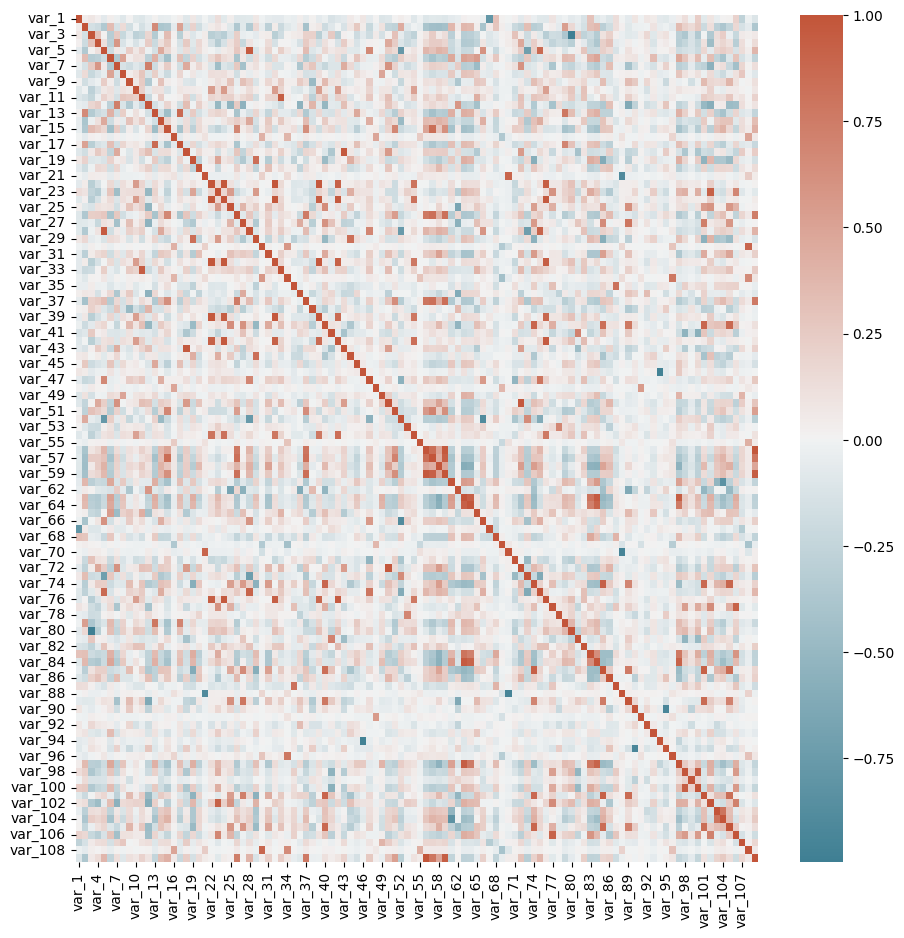

In [51]:
cormat = X_train.corr(method="pearson")
cmap = sns.diverging_palette(220, 20, as_cmap=True)
fig, ax = plt.subplots()
fig.set_size_inches(11, 11)
sns.heatmap(cormat, cmap=cmap)

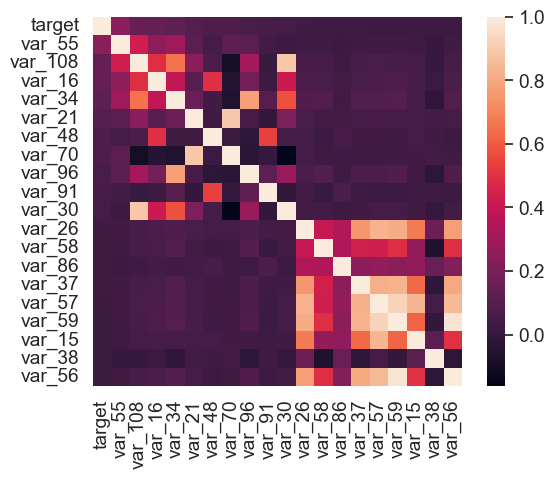

In [52]:
df_corr = df.corr()
k = 20
cols = df_corr.nlargest(k, "target")["target"].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(
    cm,
    cbar=True,
    square=True,
    yticklabels=cols.values,
    xticklabels=cols.values,
)
plt.show()

In [74]:
X_corr = X_corr.unstack()

In [84]:
pd.DataFrame(X_corr[(X_corr < 1) & (X_corr > .8)]).reset_index()

,level_0,level_1,0
0,var_3,var_80,0.994923
1,var_5,var_28,0.953672
2,var_5,var_75,0.861618
3,var_11,var_33,0.944361
4,var_13,var_17,0.863298
...,...,...,...
127,var_105,var_101,0.837302
128,var_106,var_77,0.907146
129,var_108,var_30,0.889847
130,var_109,var_56,0.987777


In [89]:
pd.DataFrame(X_corr[(X_corr < 1) & (X_corr > .8)]).reset_index()["level_0"].unique()

array(['var_3', 'var_5', 'var_11', 'var_13', 'var_15', 'var_17', 'var_18',
       'var_19', 'var_21', 'var_22', 'var_23', 'var_24', 'var_26',
       'var_28', 'var_29', 'var_30', 'var_32', 'var_33', 'var_35',
       'var_37', 'var_39', 'var_40', 'var_42', 'var_43', 'var_44',
       'var_46', 'var_50', 'var_52', 'var_54', 'var_56', 'var_57',
       'var_59', 'var_60', 'var_63', 'var_64', 'var_66', 'var_70',
       'var_72', 'var_74', 'var_75', 'var_76', 'var_77', 'var_80',
       'var_84', 'var_85', 'var_87', 'var_88', 'var_89', 'var_90',
       'var_94', 'var_95', 'var_97', 'var_98', 'var_100', 'var_101',
       'var_102', 'var_103', 'var_104', 'var_105', 'var_106', 'var_108',
       'var_109'], dtype=object)

drop correlated features with feature-engine brute force

In [90]:
df = pd.read_csv("../data/dataset_1.csv")
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=["target"], axis=1),
    df["target"],
    test_size=0.3,
    random_state=0,
)

In [92]:
sel = DropCorrelatedFeatures(
    threshold=0.8,
    method="pearson",
    missing_values="ignore"
)
sel.fit(X_train)

DropCorrelatedFeatures()

In [ ]:
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)